<a href="https://colab.research.google.com/github/solobala/CVML10/blob/main/CVML10_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фильтрация изображений

## Загружаем и выводим тестовое изображение

In [1]:
import cv2
import numpy as np

In [4]:
img = cv2.imread('/content/lena.png')

Text(0.5, 1.0, 'Размер изображения: 512x512x3')

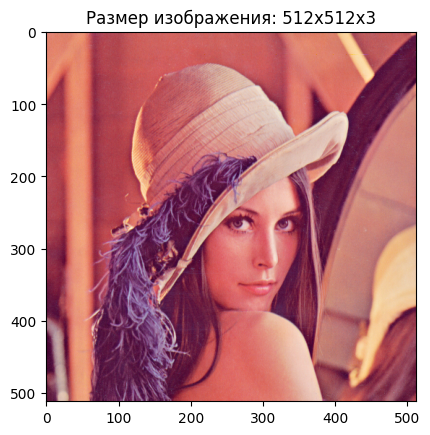

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])
plt.title('Размер изображения: %dx%dx%d' % img.shape)

## Функции создания ядер

In [6]:
def gauss_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает гауссовское ядро размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра, или острота ядра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.) # Задаем границы функции
    xx, yy = np.meshgrid(ax, ax) # квадратнгое пространство - сетка в границах ax
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (sigma * np.sqrt(2. * np.pi)) * np.exp(-e)  # применяем гауссову функцию к элементам пространства и получаем ядро
    return kernel / np.sum(kernel)

def laplace_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает ядро Лапласа размера ksize и дисперсией sigma
    У лапласова ядра есть область с отрицательными значениями"""
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (np.pi * sigma**4) * (1. - e) * np.exp(-e) # применяем  функцию лапласа к элементам пространства и получаем ядро
    return kernel / np.sum(kernel)
# словарь состоит из функций - ключи -алиасы, знаначение - собстыенно вызываемые ф-ии
kernels = {'gauss': gauss_kernel,
           'laplace': laplace_kernel}

## Визуализация ядер

\# pip install ipywidgets<br/>
\# jupyter nbextension enable --py widgetsnbextension

In [7]:
!pip install ipywidgets # пакет интерактивных виджетов для html страниц для ноутбуков

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00


In [8]:
!jupyter nbextension enable --py widgetsnbextension # после установки включаем это расширение

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Документация по интерактивным виджетам https://github.com/jupyter-widgets/ipywidgets/blob/52663ac472c38ba12575dfb4979fa2d250e79bc3/docs/source/examples/Using%20Interact.ipynb

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Функция для интерактивной визуализации ядер
def show_kernel(kernel_type, ksize, sigma):
    kernel = kernels[kernel_type](ksize, sigma) # здесь как раз передаем ф-ю по ключу kernel_type
    r = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(r, r)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, kernel,
                    cmap=plt.cm.coolwarm,
                    linewidth=0, antialiased=True)
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [12]:
from ipywidgets import interact
interact(show_kernel,
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1));

interactive(children=(Dropdown(description='kernel_type', options=('gauss', 'laplace'), value='gauss'), IntSli…

## Фильтрация изображения

In [13]:
def filter_img(kernel_type, ksize = 5, sigma = 2.5):
    kernel = kernels[kernel_type](ksize, sigma) # выбираем ф-ю - фильтр по ключу
    # cv2.CV_32F - это формат хранения.
    # Мы указываем формат, который покрывает больший диапазон чисел, чтобы не потерять при преобразовании.
    # Используем дробный 32 битный формат, рассчитанный также на отрицательные числа
    result = cv2.filter2D(img, cv2.CV_32F, kernel) # вот здесь применяем выбранный фильтр к рисунку
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    img_abs = np.abs(result)
    img_norm = img_abs / np.max(img_abs, axis=(0, 1))
    ax.imshow(img_norm[...,::-1])
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [14]:
# Это визуализация изображения с примененным фильтром
# В фильтре гаусса при увеличении размера ядра происходит размытие
# при увеличении сигма размыие еще сильнее, а если уменьшать до 0 - почти исходное получим
# Фильтр лапласа погзволяет находить границы
# при высокой сигме - почти исходное
# При малой - хорошо видны границы
interact(filter_img,
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1));

interactive(children=(Dropdown(description='kernel_type', options=('gauss', 'laplace'), value='gauss'), IntSli…